In [1]:
# Importing packages
import numpy as np
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('kc_house_data.csv')

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

The columns are:
- id: a notation for a house
- date: Date house was sold
- price: Price is prediction target
- bedrooms: Number of Bedrooms/House
- bathrooms: Number of bathrooms/House
- sqft_living: square footage of the home
- sqft_lot: square footage of the lot
- floors: Total floors (levels) in house
- waterfront: House which has a view to a waterfront
- view: Has been viewed
- condition: How good the condition is ( Overall )
- grade: Overall grade given to the housing unit, based on King County grading system
- sqft_above: square footage of house apart from basement
- sqft_basement: square footage of the basement
- yr_built: Built Year
- yr_renovated: Year when house was renovated
- zipcode: zip
- lat: Latitude coordinate
- long: Longitude coordinate
- sqft_living15: Living room area in 2015 (implies some renovations) This might or might not have affected the lotsize area
- sqft_lot15: lotSize area in 2015(implies some renovations)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
# counting null values
df.isnull().sum().sort_values(ascending = False)

sqft_lot15       0
view             0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
sqft_living15    0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
id               0
dtype: int64

In [8]:
df.shape

(21613, 21)

In [11]:
f=['sqft_living']

<b>First we form the evaluation metrics </b>

In [12]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,train_size = 0.8,random_state=3)

In [13]:
from sklearn import linear_model
from sklearn import metrics

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
X_train = np.array(train['sqft_living'], dtype = pd.Series).reshape(-1,1)
y_train = np.array(train['price'], dtype = pd.Series)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [16]:
pred = model.predict(test[f])

In [17]:
actual = []
for i in test['price']:
    actual.append(i)

actual=np.array(actual)
Error=0
count=0
for i in range(len(pred)):
    se=pred[i]-actual[i]
    Error=Error+(se*se)
    #print(Error)
    count=count+1

MeanError=Error/count

print(MeanError)
print(count)

64662971143.35186
4323


<b> Plotting the linear regression graph for price vs sqft_living</b>

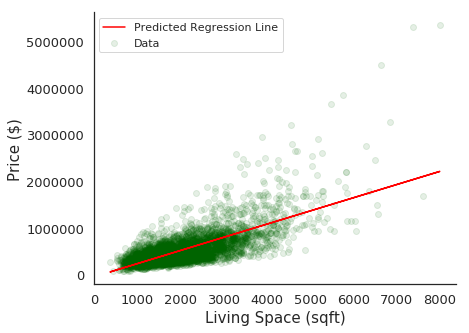

In [59]:
sns.set(style = "white", font_scale = 1)
plt.figure(figsize = (6.5,5))
plt.scatter(test[f], test['price'], color = 'darkgreen', label = "Data", alpha = 0.1)
plt.plot(test[f], model.predict(test[f]),color = "red", label = "Predicted Regression Line")
plt.xlabel("Living Space (sqft)", fontsize = 15)
plt.ylabel("Price ($)", fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)